# RJ's Branch

The following code solves the equations of motion with air drag. With drag force $-\alpha |\dot{r}|\dot{r}$ and gravitational force $-mg\hat{y}$, these equations of motion are:

$\ddot{x}=-\beta \dot{x}\sqrt{{\dot{x}^2}+{\dot{y}^2}}$

$\ddot{y}=-g-\beta \dot{y}\sqrt{{\dot{x}^2}+{\dot{y}^2}}$

where $\beta = \frac{\alpha}{m}$, $\alpha =\frac{\rho C_{d}A}{2}$, $\rho$ is the air desnisty, $C_{d}$ is the drag coefficient, and $A$ is the cross-sectional area of the projectile.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab

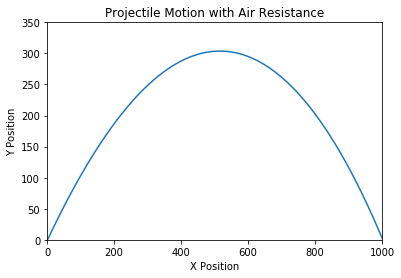

In [9]:
#Initialize physical constants
g = 9.8 #m/s^2
m = 1.0 #kg
rho = 1.0 #kg/m^3
Cd = 1.0 #constant
A = math.pi * pow(0.01,2.0) #m^2
alpha = rho * Cd * A / 2.0
beta = alpha / m

#Initial conditions
X0 = 1.0
Y0 = 0.0
Vx0 = 70.0
Vy0 = 80.0

#Time steps
steps = 1000
t_HIT = 2.0 * Vy0 / g
dt = t_HIT / steps

#With drag
X_WD = []
Y_WD = []
Vx_WD = []
Vy_WD = []

#Add initial conditions
X_WD.append(X0)
Y_WD.append(Y0)
Vx_WD.append(Vx0)
Vy_WD.append(Vy0)

#Break point
check = 0

#Calculates for every step
for i in range(1,steps+1):
    if check != 1:
        speed = pow(pow(Vx_WD[i-1],2.0)+pow(Vy_WD[i-1],2.0),0.5)

        #First calculate velocity
        Vx_WD.append(Vx_WD[i-1] * (1.0 - beta * speed * dt))
        Vy_WD.append(Vy_WD[i-1] + ( - g - beta * Vy_WD[i-1] * speed) * dt)

        #Now calculate position
        X_WD.append(X_WD[i-1] + Vx_WD[i-1] * dt)
        Y_WD.append(Y_WD[i-1] + Vy_WD[i-1] * dt)

        #Stop if hits ground
        if Y_WD[i] <= 0.0:
            check = 1
            
#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(X_WD, Y_WD)
ax.set_title("Projectile Motion with Air Resistance")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_ylim(0, 350)
ax.set_xlim(0, 1000)

#Shows the plot
plt.show()

The above plot shows the projectile motion including air drag.